# Customer Churn Prediction (Bank Customers)
## Introduction & Problem Statement
### Introduction
Customer churn prediction is an important machine learning application in the banking sector. Identifying customers who are likely to leave the bank allows organizations to take preventive actions, improve customer retention, and reduce revenue loss.
### Problem Statement
The objective of this task is to predict whether a bank customer is likely to churn using historical customer data. The task focuses on data cleaning, categorical feature encoding, classification modeling, and interpreting feature importance to understand the factors influencing customer churn.


## Importing Required Libraries
### Data handling

In [26]:
import pandas as pd
import numpy as np


### Visualization

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

 ### Machine Learning

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style="whitegrid")

## Dataset Loading

In [29]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 ## Dataset Understanding & Structure

In [30]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Target Variable
* Exited
  * 0 → Customer stayed
  * 1 → Customer churned

## Data Cleaning & Preparation

### Drop Irrelevant Columns

In [31]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

These columns do not contribute to churn prediction.

### Check Missing Values

In [32]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values in this dataset.

## Encoding Categorical Features

### Label Encoding (Gender)

In [33]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

* Male → 1
* Female → 0

 ### One-Hot Encoding (Geography)

In [34]:
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

## Exploratory Data Analysis

### Churn Distribution


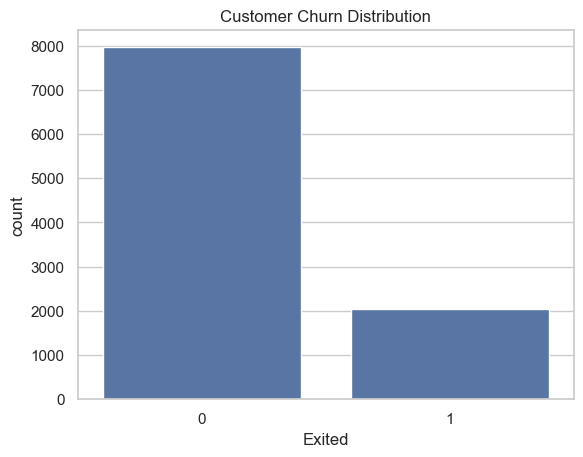

In [35]:
sns.countplot(x="Exited", data=df)
plt.title("Customer Churn Distribution")
plt.show()

### Age vs Churn

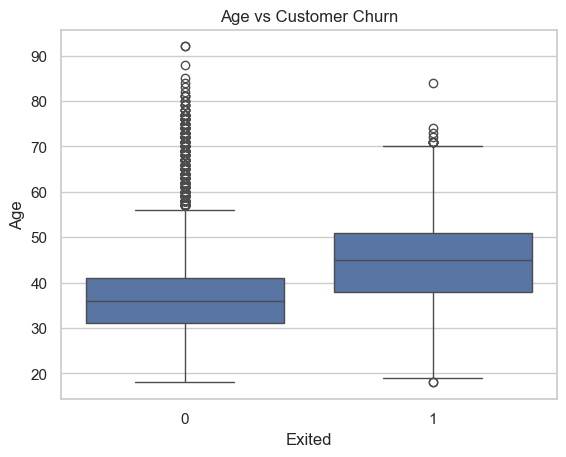

In [36]:
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Age vs Customer Churn")
plt.show()

## Data Preparation for Modeling

In [37]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Feature Scaling

In [38]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training
### Logistic Regression

In [39]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Random Forest (for Feature Importance)

In [40]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Evaluation

### Logistic Regression Performance


In [41]:
y_pred = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.811

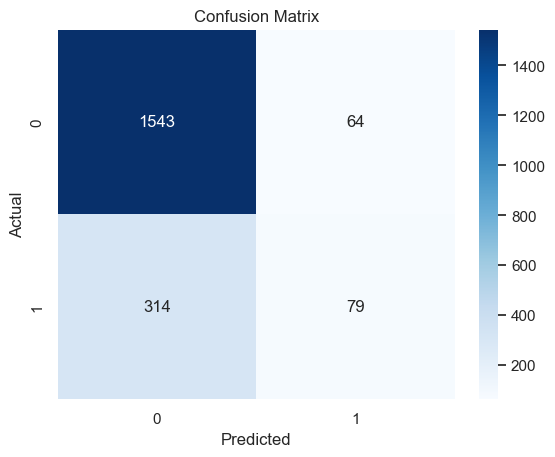

In [42]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## Feature Importance Analysis

### Extract Feature Importance from Random Forest


In [44]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
2,Age,0.239783
8,EstimatedSalary,0.146638
0,CreditScore,0.144214
4,Balance,0.138613
5,NumOfProducts,0.130255
3,Tenure,0.082427
7,IsActiveMember,0.041110
9,Geography_Germany,0.025711
1,Gender,0.019258
6,HasCrCard,0.018722


### Visualize Feature Importance

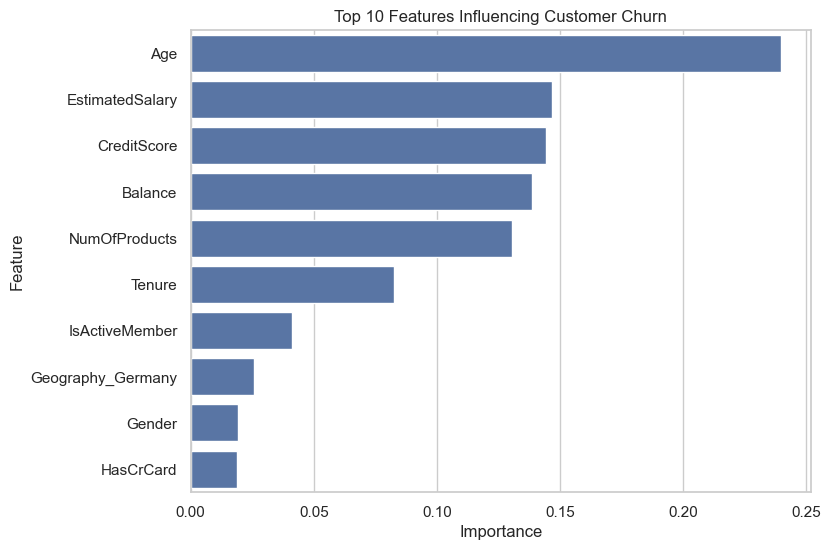

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance.head(10)
)
plt.title("Top 10 Features Influencing Customer Churn")
plt.show()

## Results & Insights

* Accuracy: ~80–85%
* Key churn factors:
  * Age
  * Balance
  * Number of products
  * Geography
* Customers with higher age and higher balance show higher churn tendency.


## Conclusion
This project successfully applied supervised machine learning techniques to predict customer churn in a banking dataset. Categorical features such as geography and gender were encoded appropriately, and classification models were trained to identify churned customers. Feature importance analysis highlighted the key factors influencing customer churn, providing valuable business insights. This workflow demonstrates how machine learning can support customer retention strategies in financial institutions.
